# Importing Libraries

In [1]:
import numpy as np  # numerical operations and array manipulation
import pandas as pd  # data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # creating visualizations and plots
import seaborn as sns  # enhanced data visualization based on Matplotlib

# Import data preprocessing libraries  from scikit-learn
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Import various classifiers from scikit-learn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Import evaluation metrics and tools from scikit-learn
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

### Loading the dataset. 

In [34]:
df = pd.read_csv('data.csv')

In [35]:
df.shape

(50, 12)

In [36]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [38]:
df.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,0.106000,5.220000,53.40000,221.500000,70.000000,64.0000,50.000000,170.580000,20.080000,1.672000
std,0.064397,2.922747,25.36348,14.820353,7.142857,29.6923,35.714286,99.034129,8.925634,0.788188
min,0.020000,1.000000,10.00000,200.000000,60.000000,40.0000,0.000000,21.000000,4.000000,0.400000
25%,0.060000,3.000000,40.00000,210.000000,65.000000,40.0000,25.000000,92.000000,12.000000,1.100000
50%,0.100000,5.000000,50.00000,220.000000,70.000000,60.0000,50.000000,165.500000,19.000000,1.550000
75%,0.150000,7.000000,80.00000,230.000000,75.000000,60.0000,75.000000,239.250000,27.000000,2.175000
max,0.200000,10.000000,90.00000,250.000000,80.000000,120.0000,100.000000,368.000000,37.000000,3.300000


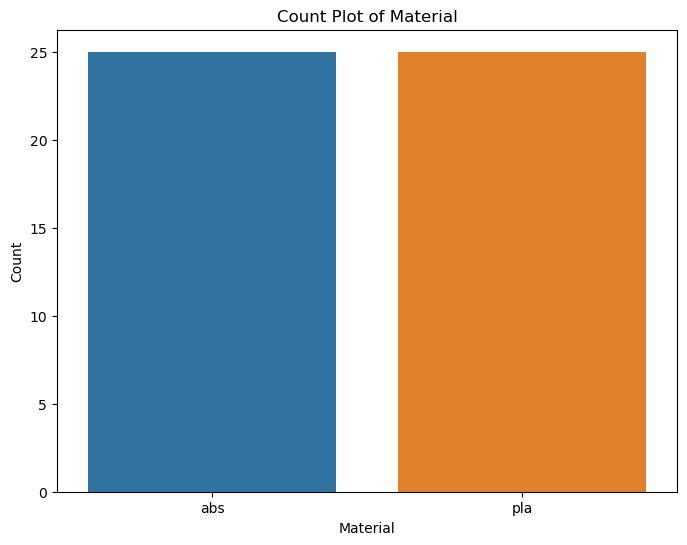

In [39]:
# Create the Count plot
plt.figure(figsize=(8, 6))  # Set the size of the figure
sns.countplot(data=df, x='material')

# Customize the plot
plt.title("Count Plot of Material")
plt.xlabel("Material")
plt.ylabel("Count")
# Show the plot
plt.show()

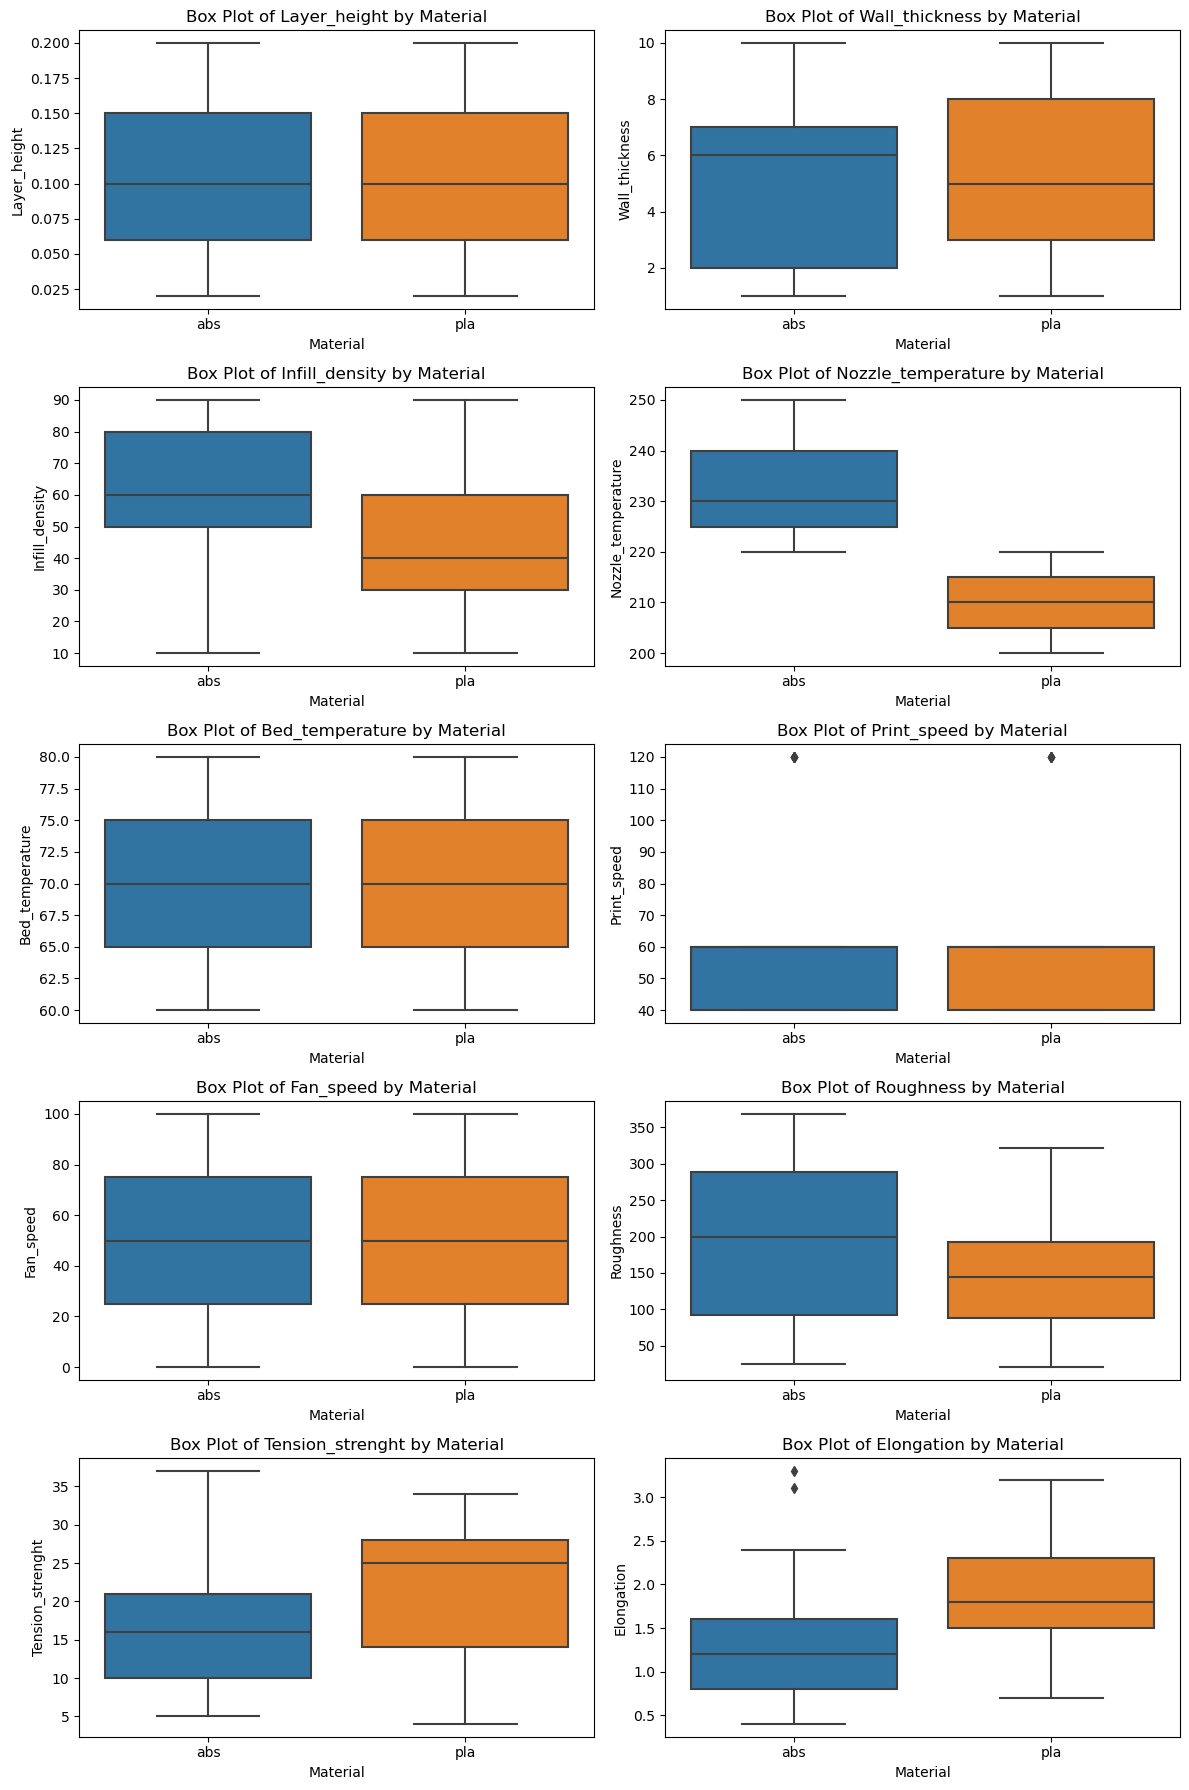

In [49]:
columns = ['layer_height', 'wall_thickness', 'infill_density',
           'nozzle_temperature', 'bed_temperature', 'print_speed',
           'fan_speed', 'roughness', 'tension_strenght', 'elongation']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

for ax, column in zip(axes.flat, columns):
    sns.boxplot(x='material', y=column, data=df, ax=ax)
    ax.set_title(f'Box Plot of {column.capitalize()} by Material')
    ax.set_xlabel('Material')
    ax.set_ylabel(f'{column.capitalize()}')

# Adjust layout spacing
plt.tight_layout()
plt.show()

### Encoding the Catagorical Features

In [31]:
# Encode infill_pattern column
pattern_encoder = LabelEncoder()
df['infill_pattern'] = pattern_encoder.fit_transform(df['infill_pattern'])

# Encode material column
label_encoder = LabelEncoder()
df['material'] = label_encoder.fit_transform(df['material'])

df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


### Clustermap of Correlation

<Figure size 1000x800 with 0 Axes>

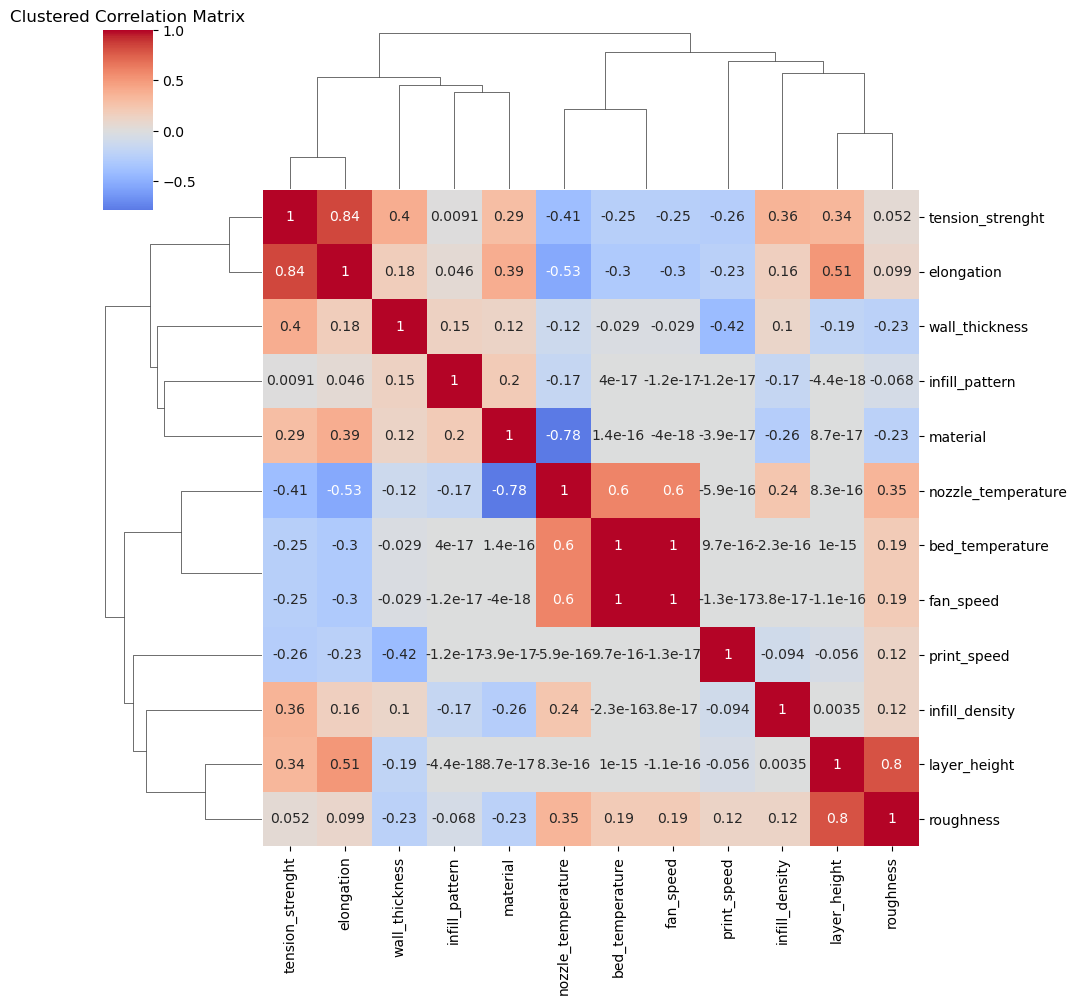

In [32]:
plt.figure(figsize=(10, 8))
sns.clustermap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Clustered Correlation Matrix')
plt.show()

### Splitting Data

In [10]:
X = df.drop(['material'], axis = 1)
y = df['material']

In [11]:
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,25,18,1.2
1,0.02,7,90,1,225,65,40,25,32,16,1.4
2,0.02,1,80,0,230,70,40,50,40,8,0.8
3,0.02,4,70,1,240,75,40,75,68,10,0.5
4,0.02,6,90,0,250,80,40,100,92,5,0.7


In [12]:
# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
12,0.06,10,50,0,230,70,60,50,118,16,1.3
4,0.02,6,90,0,250,80,40,100,92,5,0.7
37,0.15,10,30,1,210,70,60,50,168,26,2.1
8,0.02,9,70,0,215,75,40,75,24,27,1.4
3,0.02,4,70,1,240,75,40,75,68,10,0.5


### Data Normalization

In [14]:
# Data preprocessing: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Cross Validation

In [15]:
# Models to consider
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'kNN': KNeighborsClassifier(),
    'Gaussian NB': GaussianNB(),
    'MLP Classifier': MLPClassifier(random_state=42),
    'LDA': LinearDiscriminantAnalysis()
}

# Cross-validation using StratifiedKFold (for balanced classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [16]:
def get_specificity_sensitivity(y_true, y_pred):
    """
    Calculate specificity and sensitivity given true labels and predicted labels.
    
    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    
    Returns:
    specificity (float): Specificity score.
    sensitivity (float): Sensitivity score.
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = (tn / (tn + fp))
    sensitivity = (tp / (tp + fn))
    return (specificity, sensitivity)

In [17]:
# Initialize the table
table = []

# Perform cross-validation for each model
for model_name, model in models.items():
    y_scores = cross_val_predict(model, X_train_scaled, y_train, cv=cv, method='predict')
    
    # Calculate the AUC, specificity at 90% sensitivity, and corresponding cutoff
    auc = roc_auc_score(y_train, y_scores)
    specificity, sensitivity = get_specificity_sensitivity(y_train, y_scores)
    accuracy = accuracy_score(y_train, y_scores)
    precision = precision_score(y_train, y_scores)
    f1 = f1_score(y_train, y_scores)
    recall = recall_score(y_train, y_scores)
    
    table.append([model_name, auc, specificity, sensitivity, accuracy, precision, f1, recall])

# Print the table header
print("{:<20} {:<11} {:<11} {:<11} {:<11} {:<11} {:<11} {:<11}".format(
    "Model Name", "AUC", "Specificity", "Sensitivity", "Accuracy", "Precision", "F1Score", "Recall"))
# Print the separator line
print("-" * 115)

# Print the table rows
for row in table:
    model_name, auc, specificity, sensitivity, accuracy, precision, f1, recall = row
    print("{:<20} {:<11.4f} {:<11.4f} {:<11.4f} {:<11.4f} {:<11.4f} {:<11.4f} {:<11.4f}".format(
        model_name, auc, specificity, sensitivity, accuracy, precision, f1, recall))

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Name           AUC         Specificity Sensitivity Accuracy    Precision   F1Score     Recall     
-------------------------------------------------------------------------------------------------------------------
Logistic Regression  1.0000      1.0000      1.0000      1.0000      1.0000      1.0000      1.0000     
Decision Tree        0.7879      0.9091      0.6667      0.8000      0.8571      0.7500      0.6667     
SVM                  0.8813      0.8182      0.9444      0.8750      0.8095      0.8718      0.9444     
Random Forest        0.8939      0.9545      0.8333      0.9000      0.9375      0.8824      0.8333     
Gradient Boosting    0.7879      0.9091      0.6667      0.8000      0.8571      0.7500      0.6667     
kNN                  0.7854      0.6818      0.8889      0.7750      0.6957      0.7805      0.8889     
Gaussian NB          0.7475      0.7727      0.7222      0.7500      0.7222      0.7222      0.7222     
MLP Classifier       0.9773      0.9545     

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
tb_df = pd.DataFrame(table)
tb_df.columns = ["Model Name", "AUC", "Specificity", "Sensitivity", "Accuracy", "Precision", "F1Score", "Recall"]
tb_df = tb_df.round(4)

In [54]:
tb_df.to_csv("cross_val_performance.csv", index=False)

## Choosing Best Features

In [18]:
# Create and train MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate permutation importance
perm_importance = permutation_importance(clf, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Get feature names from DataFrame columns
feature_names = X_train.columns

selected_features = []
# Print feature importance scores along with names
for i, score in enumerate(perm_importance.importances_mean):
    feature_name = feature_names[i]
    print(f"{feature_name}: {score:.4f}")
    if score > 0.0:
        selected_features.append(feature_name)

Accuracy: 1.00
layer_height: 0.0000
wall_thickness: 0.0300
infill_density: 0.0533
infill_pattern: 0.0000
nozzle_temperature: 0.4233
bed_temperature: 0.1400
print_speed: 0.0000
fan_speed: 0.0533
roughness: 0.0000
tension_strenght: 0.0000
elongation: 0.1267


In [19]:
print(selected_features)

['wall_thickness', 'infill_density', 'nozzle_temperature', 'bed_temperature', 'fan_speed', 'elongation']


In [20]:
# Train a model using the selected features
selected_X_train = X_train[selected_features]
selected_X_test = X_test[selected_features]

In [21]:
# Data preprocessing: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(selected_X_train)
X_test_scaled = scaler.transform(selected_X_test)

## Hyperparameter Tuning

In [22]:
# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create MLPClassifier
clf = MLPClassifier(max_iter=500, random_state=42)

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test set
test_score = grid_search.score(X_test_scaled, y_test)
print("Test Set Score:", test_score)

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Score: 1.0
Test Set Score: 1.0


/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Final Model Building

Final Model Accuracy: 1.00


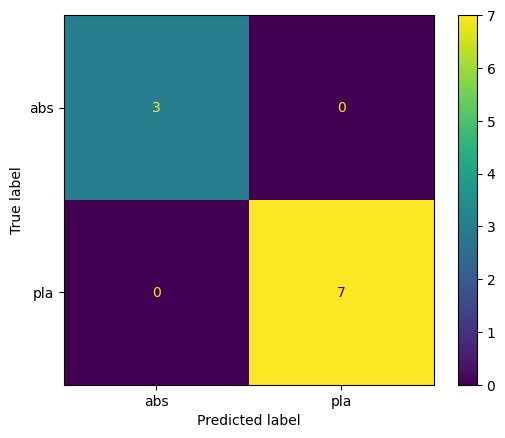

In [23]:
# Hyperparameters from your tuning results
best_hyperparameters = {
    'activation': 'relu',
    'alpha': 0.0001,
    'hidden_layer_sizes': (20,),
    'learning_rate': 'constant',
    'solver': 'adam'
}

# Create the final MLPClassifier model
final_clf = MLPClassifier(
    activation=best_hyperparameters['activation'],
    alpha=best_hyperparameters['alpha'],
    hidden_layer_sizes=best_hyperparameters['hidden_layer_sizes'],
    learning_rate=best_hyperparameters['learning_rate'],
    solver=best_hyperparameters['solver'],
    max_iter=1000,
    random_state=42
)

# Train the final model on your full training data
final_clf.fit(X_train_scaled, y_train)

# Predict using the final model
y_pred_final = final_clf.predict(X_test_scaled)

# Evaluate the final model's performance
accuracy_final = accuracy_score(y_test, y_pred_final)
confusion = confusion_matrix(y_test, y_pred_final)

print(f"Final Model Accuracy: {accuracy_final:.2f}")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['abs', 'pla'])
disp.plot()
plt.show()

In [24]:
# Generate the classification report
report = classification_report(y_test, y_pred_final)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

